In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import numpy as np
import umap

# Algoritmos de reducción de dimensionalidad
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# Algoritmos clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import cdist

In [283]:
file_path = 'SmartFarmingCropYield.csv'

dataset = pd.read_csv(file_path)

# Análisis exploratorio de datos (EDA)

In [284]:
#Creamos copia del dataset original
df = dataset.copy()

#Renombramos las columnas para que no comiencen con un espacio
df.columns = df.columns.str.strip().str.replace(" ", "")

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo
309,Soja,38.61,6.20,17.08,279.06,73.09,9.60,Goteo,Organico,43.78,131,2586.36,0.77,Severo


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

**Valores faltantes o duplicados**

In [286]:
df.duplicated().values.any()


np.False_

In [287]:
df.isna().sum()

tipoCultivo                   0
humedadSuelo(%)               0
pHSuelo                       0
temperatura(°C)               0
precipitacion(mm)             0
humedad(%)                    0
horasLuzSolar                 0
tipoRiego                    91
tipoFertilizante              0
mlPesticida                   0
diasTotales                   0
rendimientoKg_hectarea        0
indiceNDVI                    0
estadoEnfermedadesCultivo    83
dtype: int64

In [288]:
df[df.isna().any(axis=1)]

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
8,Maiz,42.43,7.07,20.70,224.15,76.53,8.70,NaN,Organico,13.55,127,4942.95,0.65,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Soja,40.46,7.44,18.31,237.68,59.21,8.68,NaN,Mixto,17.22,100,4287.59,0.77,Severo
305,Soja,19.06,7.20,20.93,117.13,45.96,5.34,Aspersor,Inorganico,6.76,149,2531.89,0.79,NaN
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo


In [289]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,Aspersor,Mixto,47.61,121,5264.09,0.70,Leve
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,Manual,Inorganico,49.78,118,5598.46,0.50,Leve
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,Goteo,Organico,23.12,145,2437.08,0.55,Moderate
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,Aspersor,Mixto,31.75,116,4629.49,0.42,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,Manual,Mixto,35.50,128,5528.08,0.31,Leve
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,Goteo,Inorganico,45.16,112,2023.56,0.30,Leve
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,Aspersor,Organico,20.13,122,3708.29,0.47,Moderate
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve


**Distrubuciones de las variables**

In [290]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

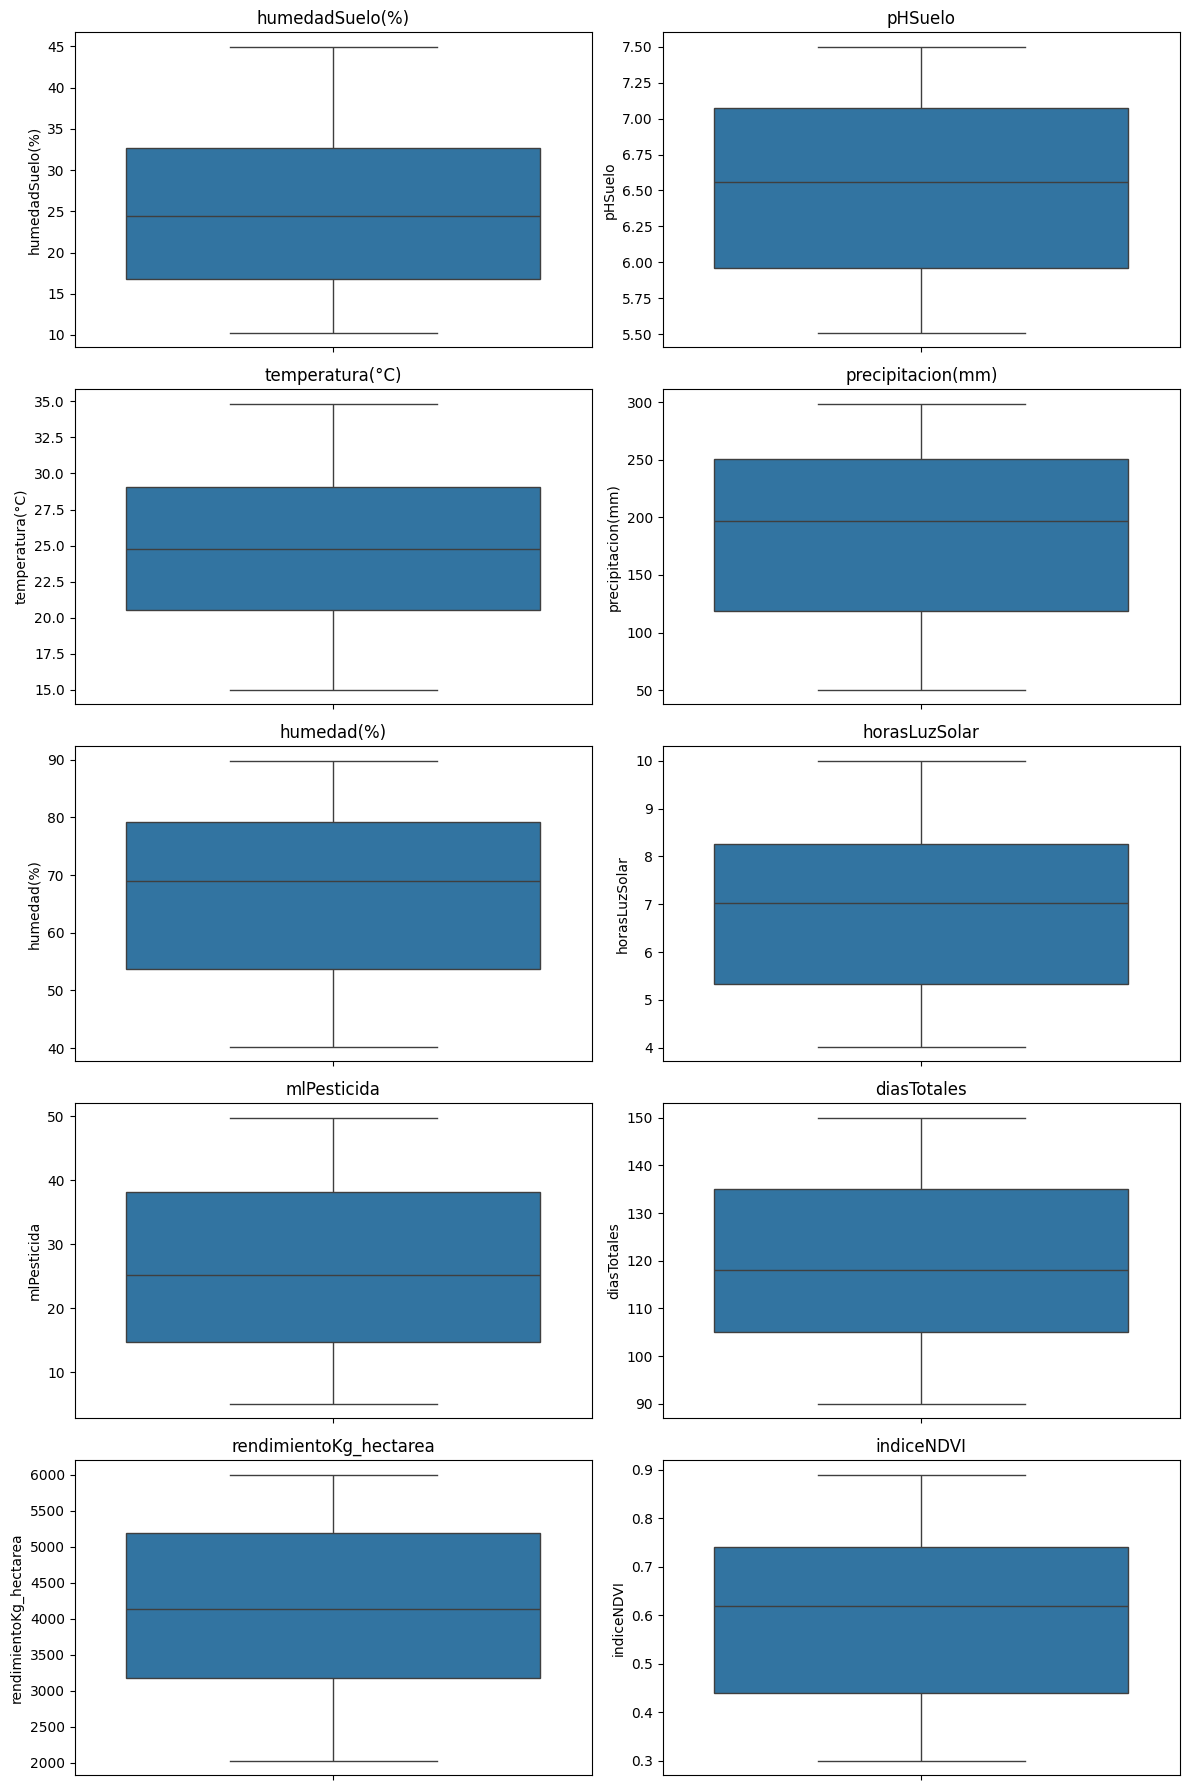

In [291]:
# Definimos el layout → 5 filas x 2 columnas = 10 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Aplanamos la grilla de ejes
axes = axes.flatten()

# Iteramos
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustamos diseño
plt.tight_layout()
plt.show()

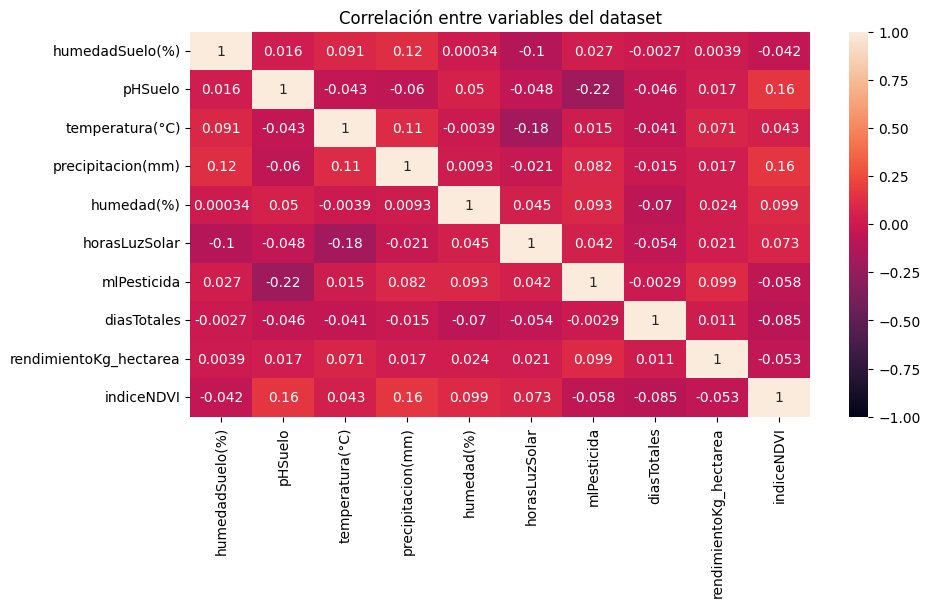

In [292]:
#Selección de columnas númericas
columnas_numericas = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'rendimientoKg_hectarea', 'indiceNDVI']

plt.figure(figsize=(10,5))
sns.heatmap(df[cols].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlación entre variables del dataset')
plt.show()

**Codificación de variables catgorícas**

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                163 non-null    object 
 1   humedadSuelo(%)            163 non-null    float64
 2   pHSuelo                    163 non-null    float64
 3   temperatura(°C)            163 non-null    float64
 4   precipitacion(mm)          163 non-null    float64
 5   humedad(%)                 163 non-null    float64
 6   horasLuzSolar              163 non-null    float64
 7   tipoRiego                  163 non-null    object 
 8   tipoFertilizante           163 non-null    object 
 9   mlPesticida                163 non-null    float64
 10  diasTotales                163 non-null    int64  
 11  rendimientoKg_hectarea     163 non-null    float64
 12  indiceNDVI                 163 non-null    float64
 13  estadoEnfermedadesCultivo  163 non-null    object 

In [294]:
df = pd.get_dummies(data=df, columns=['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'], drop_first=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,144,2931.16,0.80,True,False,True,False,False,False
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,121,5264.09,0.70,False,False,True,False,False,False
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,118,5598.46,0.50,False,True,False,False,False,False
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,145,2437.08,0.55,True,False,False,True,True,False
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,116,4629.49,0.42,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,128,5528.08,0.31,False,True,True,False,False,False
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,112,2023.56,0.30,True,False,False,False,False,False
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,122,3708.29,0.47,False,False,False,True,True,False
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,93,4503.82,0.88,False,False,False,False,False,False


In [295]:
df['mas_120_dias'] = df['diasTotales'].apply(lambda x: True if x > 120 else False)
df.drop(columns='diasTotales', inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,2931.16,0.80,True,False,True,False,False,False,True
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,5264.09,0.70,False,False,True,False,False,False,True
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,5598.46,0.50,False,True,False,False,False,False,False
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,2437.08,0.55,True,False,False,True,True,False,True
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,4629.49,0.42,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,5528.08,0.31,False,True,True,False,False,False,True
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,2023.56,0.30,True,False,False,False,False,False,False
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,3708.29,0.47,False,False,False,True,True,False,True
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,4503.82,0.88,False,False,False,False,False,False,False


**Normalización de las variables**

In [297]:
X = df.drop(columns=['tipoCultivo'])
y = df['tipoCultivo']

scaler = StandardScaler()
x_num_escaladas = scaler.fit_transform(X[columnas_numericas])

x_escalado = X.copy()
x_escalado[columnas_numericas] = x_num_escaladas
x_escalado

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,True,False,True,False,False,False,True
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,False,False,True,False,False,False,True
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,False,True,False,False,False,False,False
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,True,False,False,True,True,False,True
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.392030,0.302156,1.533782,-1.247039,1.453092,-0.361201,0.692032,1.190522,-1.626397,False,True,True,False,False,False,True
159,0.154561,-0.814210,-1.894692,0.306484,-0.529829,1.462461,1.407924,-1.847087,-1.682694,True,False,False,False,False,False,False
160,0.618569,-1.388809,-1.706883,-0.448952,-0.842507,0.470845,-0.447022,-0.386816,-0.725645,False,False,False,True,True,False,True
161,0.674210,1.500607,-0.658602,1.370331,1.228624,-0.794321,1.427933,0.302725,1.582534,False,False,False,False,False,False,False


# PCA

In [320]:
# Obtener todas las componentes principales
pca = PCA(n_components=X.shape[1])

pca_features = pca.fit_transform(x_escalado)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
             'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16' ])
pca_df['tipoCultivo'] = y

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo
0,-0.642346,1.783122,0.898370,-1.039368,0.030102,0.295266,0.461941,-0.098116,0.654414,-0.217500,0.180138,-0.656436,0.996865,-0.162915,0.303314,0.192924,Trigo
1,1.957355,-0.428663,1.521323,-0.034412,0.100274,-0.359182,-1.486390,-0.472308,-0.991359,-0.538066,0.073177,-0.380038,0.407967,-0.230813,-0.203880,0.643665,Maiz
2,1.659851,-0.758614,0.258841,1.131884,1.443107,0.868873,-1.345227,0.447661,-0.744343,-0.130929,-0.479013,0.033737,-0.657024,-0.560675,0.174475,-0.067440,Soja
3,-1.186677,-0.772195,0.271823,-0.872184,0.375715,-1.211770,0.286553,-0.499264,0.564099,0.867116,0.013516,0.354377,0.853552,0.208992,0.176219,-0.174991,Trigo
4,1.000885,-0.839987,-1.294042,-0.280310,-1.410824,-0.903628,-1.048971,-0.560749,-0.025696,-0.102753,-0.708308,-0.550314,-0.214532,0.363164,-0.269542,0.260040,Soja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.204989,-0.440707,-0.581652,2.529954,0.751203,-0.788544,0.854034,0.139107,0.530209,-0.955323,-0.549196,0.014992,0.573481,-0.199467,0.452600,0.324547,Maiz
159,-0.343411,-2.595933,0.142980,-2.016906,1.380872,0.802261,-0.444025,-0.006409,1.278410,0.212863,-0.165115,-0.695859,-0.218588,-0.524232,0.198729,-0.146159,Maiz
160,-0.476887,-1.627584,-0.869272,-1.150162,0.597718,0.985264,0.041659,-0.386188,-1.107861,0.587345,0.003299,0.509717,0.431396,0.178652,-0.474678,0.380146,Trigo
161,0.545410,1.563940,2.070611,0.444869,0.887702,0.239945,-1.820315,0.507229,0.162744,0.280053,-0.258536,-0.165522,-0.489535,-0.559157,-0.438207,0.240552,Maiz


In [321]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          163 non-null    float64
 1   PC2          163 non-null    float64
 2   PC3          163 non-null    float64
 3   PC4          163 non-null    float64
 4   PC5          163 non-null    float64
 5   PC6          163 non-null    float64
 6   PC7          163 non-null    float64
 7   PC8          163 non-null    float64
 8   PC9          163 non-null    float64
 9   PC10         163 non-null    float64
 10  PC11         163 non-null    float64
 11  PC12         163 non-null    float64
 12  PC13         163 non-null    float64
 13  PC14         163 non-null    float64
 14  PC15         163 non-null    float64
 15  PC16         163 non-null    float64
 16  tipoCultivo  163 non-null    object 
dtypes: float64(16), object(1)
memory usage: 21.8+ KB


componentes principales?

In [322]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [323]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_,
                        'Proporción de variancia explicada':pca.explained_variance_ratio_,
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.370130,0.128901,0.128901
1,1.314887,0.123703,0.252604
2,1.235663,0.116250,0.368854
3,1.050705,0.098849,0.467703
4,0.970178,0.091273,0.558976
5,0.956519,0.089988,0.648965
6,0.804472,0.075684,0.724649
7,0.755328,0.071060,0.795709
8,0.679271,0.063905,0.859614
9,0.339485,0.031938,0.891553


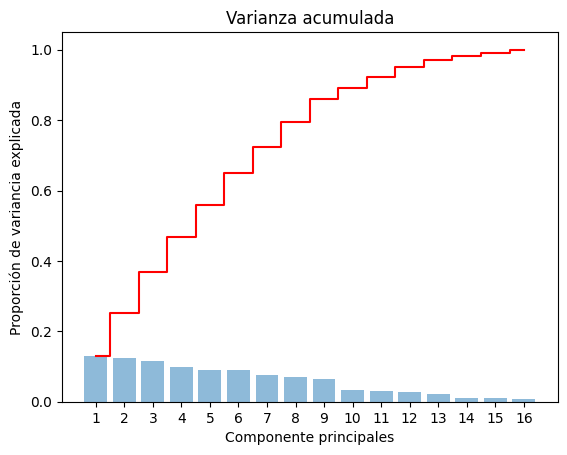

In [324]:
plt.bar(range(1,17), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,17), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.title('Varianza acumulada')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.xticks([x for x in range(1,17,1)])
plt.show()

In [325]:
pca_filtrado = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'tipoCultivo']]

In [326]:
features = pca_filtrado.drop(columns=['tipoCultivo']).columns.to_list()

unique_tipoCultivo = pca_filtrado['tipoCultivo'].unique()
num_colors = len(unique_tipoCultivo)
color_palette = plt.get_cmap('tab20', num_colors)

tipoCultivo_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i,
                       cultivo in enumerate(unique_tipoCultivo)}

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_filtrado["tipoCultivo"],
                 labels={'color': 'tipoCultivo'},
                 color_discrete_map=tipoCultivo_color_map,
                 title="Distribución de tipoCultivo en 2 dimensiones")

fig.show()

explicacion

# ISOMAP

In [341]:
isomap = Isomap(n_neighbors=34, n_components=2)
X_reduced = isomap.fit_transform(x_escalado)

df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_isomap['tipoCultivo'] = y

In [328]:
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color='tipoCultivo',
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP')
fig_isomap_2d.show()

# T-SNE

In [342]:
tsne = TSNE(n_components=2, init='random', method='exact', random_state=42, max_iter=1000, perplexity=30) 
X_reduced_tsne = tsne.fit_transform(x_escalado)

tsne_df = pd.DataFrame(
    data=X_reduced_tsne,
    columns=['PC1', 'PC2'])
tsne_df['tipoCultivo'] = y

In [343]:
fig_tsne_2d = px.scatter(tsne_df, x='PC1', y='PC2', color = y,
                         labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                         title='T-SNE 2D Con PC1 y PC2')
fig_tsne_2d.show()

## K-MEANS

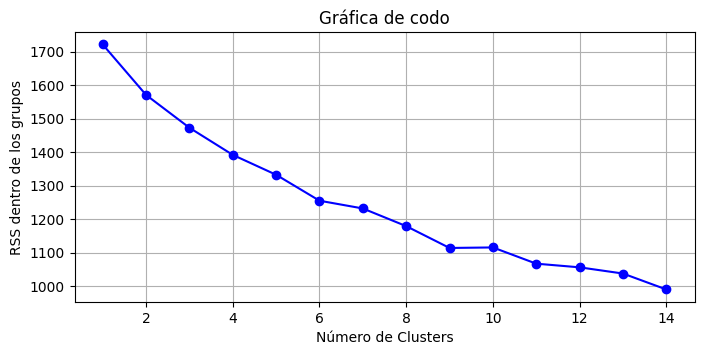

In [344]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=k, random_state=42).fit(x_escalado) for k in Nc]

# La suma de residuos cuadrados intra grupos de kMeans en sklearn se guarda en
# el atributo inertia
inertias = [model.inertia_ for model in kmeans]

plt.figure(figsize=(8, 3.5))
plt.plot(Nc,inertias, "bo-")
plt.xlabel('Número de Clusters')
plt.ylabel('RSS dentro de los grupos')
plt.title('Gráfica de codo')
plt.grid()
plt.show()

GAP

In [345]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(x_escalado)
    return kmeans.inertia_

In [346]:
gaps = []
max_k = 10

# Calcula el Gap Statistic para determinar el número óptimo de clusters

for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(x_escalado, k)
    #Calculo la inercia de datos aleatorios con la misma estructura que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

#se selecciona el valor de k (número de clusters) que maximiza el Gap Statistic.
optimal_k = np.argmax(gaps) + 1

print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

Número óptimo de clusters según el Gap Statistic: 8


KMEANS de nuevo|

In [354]:
kmeans = KMeans(n_clusters=8, random_state=42, init='k-means++', n_init=5, algorithm='lloyd')
kmeans.fit(x_escalado) #Entrenamos el modelo
y_pred = kmeans.predict(x_escalado)

In [355]:
df_kmeans = pca_df.copy()

df_kmeans['Etiquetas KMeans'] = kmeans.labels_
df_kmeans['Etiquetas KMeans'] = df_kmeans['Etiquetas KMeans'].astype('category')
df_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo,Etiquetas KMeans
0,-0.642346,1.783122,0.898370,-1.039368,0.030102,0.295266,0.461941,-0.098116,0.654414,-0.217500,0.180138,-0.656436,0.996865,-0.162915,0.303314,0.192924,Trigo,6
1,1.957355,-0.428663,1.521323,-0.034412,0.100274,-0.359182,-1.486390,-0.472308,-0.991359,-0.538066,0.073177,-0.380038,0.407967,-0.230813,-0.203880,0.643665,Maiz,3
2,1.659851,-0.758614,0.258841,1.131884,1.443107,0.868873,-1.345227,0.447661,-0.744343,-0.130929,-0.479013,0.033737,-0.657024,-0.560675,0.174475,-0.067440,Soja,3
3,-1.186677,-0.772195,0.271823,-0.872184,0.375715,-1.211770,0.286553,-0.499264,0.564099,0.867116,0.013516,0.354377,0.853552,0.208992,0.176219,-0.174991,Trigo,7
4,1.000885,-0.839987,-1.294042,-0.280310,-1.410824,-0.903628,-1.048971,-0.560749,-0.025696,-0.102753,-0.708308,-0.550314,-0.214532,0.363164,-0.269542,0.260040,Soja,5


In [356]:
np.set_printoptions(precision=6)
kmeans.cluster_centers_
# caracteristicas normalizadas que tendria el centroide de ese cluster.

array([[ 0.715707,  0.442185, -0.746982, -0.054073,  0.680299,  0.164778,
        -0.739447, -0.363288, -0.977325,  0.352941,  0.352941,  0.294118,
         0.529412,  0.411765,  0.294118,  0.529412],
       [-1.083596,  0.977604, -0.226312, -0.594076,  0.157304,  0.361751,
         0.171152,  1.191365, -0.046059,  0.428571,  0.214286,  0.142857,
         0.285714,  0.285714,  0.214286,  0.357143],
       [ 0.444322,  0.024281,  0.474712, -0.696095, -0.447861, -1.038742,
        -0.189947, -0.017314, -0.715219,  0.296296,  0.333333,  0.555556,
         0.148148,  0.37037 ,  0.333333,  0.407407],
       [ 0.140746, -0.464759,  0.117639,  0.484859,  0.764355, -0.828243,
         1.068929,  0.498674,  0.309148,  0.190476,  0.47619 ,  0.238095,
         0.428571,  0.190476,  0.333333,  0.619048],
       [ 1.134442, -0.531835,  0.593203,  0.640476, -0.492155,  0.98033 ,
         0.809569,  0.19656 ,  0.415309,  0.2     ,  0.6     ,  0.133333,
         0.533333,  0.4     ,  0.333333,  0.4666

In [357]:
fig = px.scatter_3d(df_kmeans, x='PC1', y='PC2', z='PC3',
                    color='Etiquetas KMeans',
                    title='Dispersión de las variedades de trigo (K-means)')
fig.show()

## Clustering jerarquico

In [358]:
Z = linkage(x_escalado, "ward")

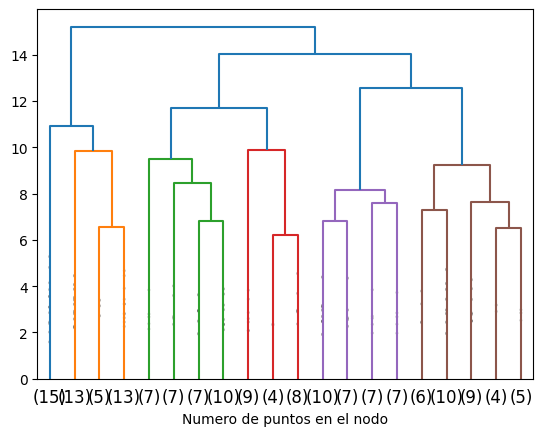

In [359]:
dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = True,
           show_contracted = True)
plt.axhline(y=110, c='k', linestyle='dashed')
plt.xlabel("Numero de puntos en el nodo")
plt.show()

In [ ]:
distancias=[]
for i in range(1, 10):
    clustering = AgglomerativeClustering(n_clusters=i) # Aplica clustering jerárquico con i clusters
    clustering.fit(x_escalado)

    # Calcula la matriz de distancias por pares entre los puntos
    pairwise_distances = cdist(x_escalado, x_escalado, 'euclidean')

    # Calcula la distancia total dentro de los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        # Encuentra los índices de los puntos en el cluster j
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()
        # Suma las distancias dentro del cluster


    distancias.append(distancia_total)
    # Almacena la distancia total para el número de clusters i

ValueError: Unsupported dtype object

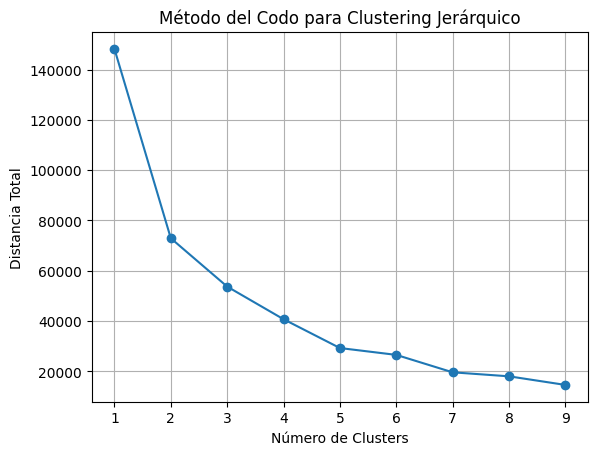

In [ ]:
# Grafica la distancia total en función del número de clusters
plt.plot(range(1, 10), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.grid()
plt.show()

In [ ]:
n_clusters = 5
def calculate_intra_cluster_dispersion(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)

    # Calcula los centroides de los clústeres como la media de los puntos dentro de cada clúster
    centroids = np.array([np.mean(X_scaled[labels == i], axis=0) for i in range(k)])

    # Calcula la dispersión intraclúster sumando las distancias al cuadrado entre los puntos y sus centroides
    # np.linalg.norm calcula la norma (distancia euclidiana) entre los puntos y el centroide correspondiente
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_scaled[labels] - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion

In [ ]:
# gaps = []
# max_k = 15
# for k in range(1, max_k + 1):
#     # Calcula la dispersión intraclúster en los datos reales para 'k' clústeres
#     real_inertia = calculate_intra_cluster_dispersion(x_escalado, k, linkage='ward')

#     inertia_list = []
#     for _ in range(10):
#       random_data = np.random.rand(*x_escalado.shape)
#       intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
#       inertia_list.append(intra_cluster_dispersion)

#     reference_inertia = np.mean(inertia_list)

#     gap = np.log(reference_inertia) - np.log(real_inertia)
#     gaps.append(gap)

# optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 13


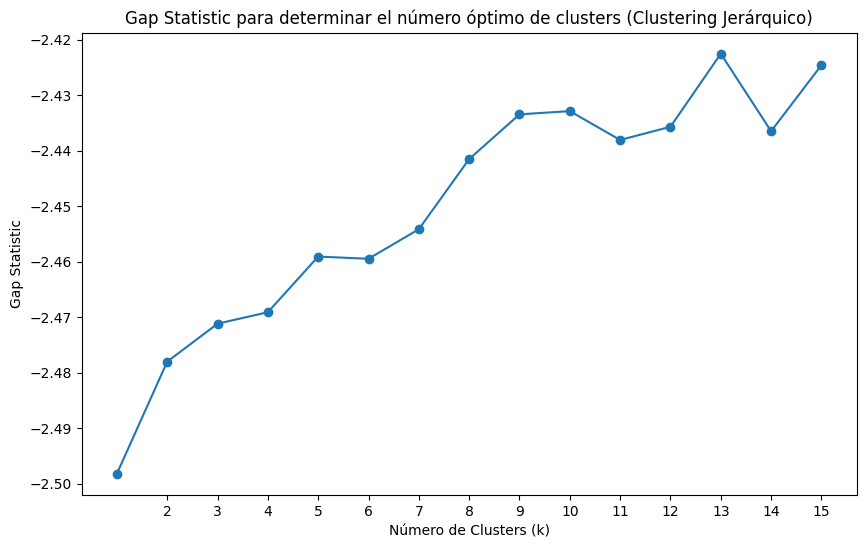

In [ ]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.xticks([x for x in range(2,16,1)])
plt.show()

In [ ]:
n_clusters = 5

clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(x_escalado) # Asigna los clusters a los datos

df_clustering = x_escalado.copy()

df_clustering['Etiquetas jerarquico'] = cluster_assignments # Añade la columna con el cluster asignado a cada punto

df_clustering.head()

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias,Etiquetas jerarquico
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,1.525297,-0.733305,1.420746,-0.694131,-0.694131,-0.684448,1.069924,3
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,-0.655610,-0.733305,1.420746,-0.694131,-0.694131,-0.684448,1.069924,1
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,-0.655610,1.363690,-0.703856,-0.694131,-0.694131,-0.684448,-0.934646,1
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,1.525297,-0.733305,-0.703856,1.440650,1.440650,-0.684448,1.069924,2
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,-0.655610,-0.733305,1.420746,-0.694131,1.440650,-0.684448,-0.934646,3


In [ ]:
fig = px.scatter_3d(df_clustering, x='humedadSuelo(%)', y='pHSuelo', z='temperatura(°C)',
                    color='Etiquetas jerarquico',
                    title='Dispersión de las variedades de trigo (Clustering)')
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples

silhouette_avg = silhouette_score(x_escalado, cluster_assignments)
silhouette_avg

0.030464615619245697

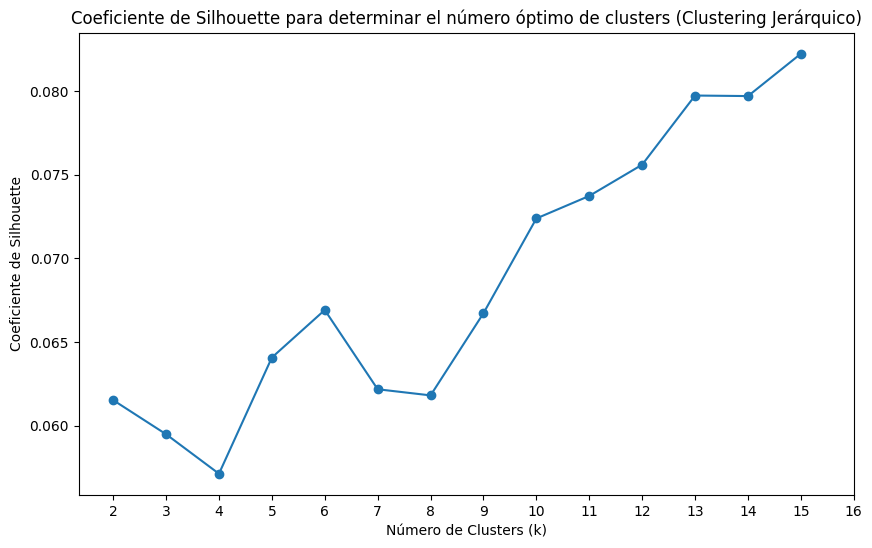

In [362]:
def calculate_silhouette(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 15

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(x_escalado, k)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.xticks([x for x in range(2, 17, 1)])
plt.show()